In [2]:
# Permet de tout executer au lancement du notebook + conserver le notebook actif pendant 2h
from IPython.display import Javascript
from masquer import *
Javascript("""
function repeter(){
IPython.notebook.kernel.execute("a=1");
}
// execute a = 1 en python toutes les 8 minutes pendant 2h
let timerId = setInterval(() => repeter(), 480000);
setTimeout(() => { clearInterval(timerId); alert('fin de cession'); }, 7200000);

// Supprimer la taille limite pour la sortie d'une cellule
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};
IPython.notebook.kernel.execute("url = '" + window.location + "'");

// Exécuter toutes les cellule du notebook
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            
                
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
                

        }
    );
    window.scrollTo(0, 0);""")

<IPython.core.display.Javascript object>

<h1 style="text-align:center;"> <a name="titre"></a>Formation Jupyter</h1>

In [3]:
import os
from IPython.display import HTML
l = os.popen("jupyter notebook list").readlines()
token = l[1].split("?token=")[1].split(" :: ")[0]
url2=url +"?token="+token
print("lien à partager si besoin d'aide")
display(HTML("<a href="+url2+" >"+url2+"</a>"))


lien à partager si besoin d'aide


<center>Cette formation n'a pas vocation à vous apprendre à programmer en python. Le but est de découvrir et de configurer un environnement Jupyter afin de pouvoir l'utiliser avec les élèves en présence ou à distance.  
Si vous rencontrez des difficultés pendant la formation, vous pouvez:</center>

1. sauvegarder votre notebook
2. envoyer le lien ci-dessus qui me permettra de rentrer sur votre serveur virtuel, de voir votre notebook, de le commenter et de le modifier
3. rafraichir la page afin de voir les modifications



## SOMMAIRE

[I. L'environnement sur github](#partie1)

<span style="margin-left:2em;">[I.1. Reproduire l'environnement](#partie1.1)</span>

<span style="margin-left:2em;">[I.2. Obtenir les liens de partage](#partie1.2)</span>

<span style="margin-left:2em;">[I.3. Mises à jour et personnalisation](#partie1.3)</span>


[II. Jupyter](#partie2)

<span style="margin-left:2em;">[II.1. Utilisation de l'environnement de programmation](#partie2.1)</span>

<span style="margin-left:2em;">[II.2. Les cellules de code](#partie2.2)</span>

<span style="margin-left:2em;">[II.3. Les cellules markdown](#partie2.3)</span>

<span style="margin-left:2em;">[II.4. Mise ne forme avancée](#partie2.4)</span>

[III. Exports et utilisations](#partie3)

[IV. Petites recettes](#partie4)

## <a name="partie1"></a> I. L'environnement sur github 

### <span style="margin-left:2em;"><a name="partie1.1"></a>I.1 Reproduire l'environnement</span>

Il vous faut un espace GITHUB pour pouvoir récupérer l'ensemble des fichiers, les modifier puis fabriquer vos propres serveurs virtuels. La première étape est donc de s'inscrire sur [www.github.com](https://www.github.com)

Il faut ensuite aller sur mon dépôt lié à cette formation. Pour info le nom d'utilisateur est **jcamponovo** et il s'agit du dépôt **formation2020**.  
On y accède donc directement avec https://www.github.com/jcamponovo/formation2020

Pour copier l'environnement, il suffit de cliquer sur le bouton "fork" dans la barre d'outils puis de se connecter à son compte github (si vous n'êtes pas déjà identifié).


![copie d'écran espace github](img/fork.png)

Bravo, vous venez de cloner le dépôt github, vous disposez donc d'un environnement Jupyter complètement configuré et prêt à fonctionner en ligne.

#### [Retour](#titre)

### <span style="margin-left:2em;"><a name="partie1.2"></a>I.2 Obtenir les liens de partage</span>

Pour obtenir le lien de partage de votre nouvel espace, vous pouvez aller sur https://mybinder.org/ ou faire directement la manipulation ci-dessous. Il suffit de compléter le formulaire proposé:
* entrer le nom du dépôt qui est de la forme <nom d'utilisateur>/<nom du dépôt> par exemple dans mon cas il s'agit de **jcamponovo/formation2020**, dans votre cas il faudr remplacer jcamponovo par votre nom d'utilisateur.
* la branche est inutile (ici c'est master et il n'y en n'a qu'une seule)
* entrer le nom du notebook vers lequel vous voulez que le lien pointe par exemple **refraction2.ipynb**
* votre lien est disponible tout en bas avec une icone permettant de le copier.

In [4]:
from IPython.display import IFrame
IFrame(src="https://mybinder.org", width = 900, height=1100)

Les liens mybinder sont toujours conçus de la même façon:

* ils démarrent par **https://mybinder.org/v2/gh/** 
* suivi du nom d'utilisateur, du nom du dépot et de la branche. Pour moi cela donne **jcamponovo/formation2020/master**. 
* Enfin de manière facultative vous pouvez passer d'autres options comme le nom d'un fichier à lancer directement ou la forme appliweb à utiliser. Par exemple ici **?filepath=refraction2.ipynb** pour lancer le notebook refraction2.ipynb au clic du lien, ou **?urlpath=apps/environnement.ipynb** pour lancer le fichier environnement.ipynb directement en mode appli web.


Vous avez ainsi mes deux liens de démonstration **https://mybinder.org/v2/gh/jcamponovo/formation2020/master?filepath=refraction2.ipynb** et **https://mybinder.org/v2/gh/jcamponovo/formation2020/master?urlpath=apps/environnement.ipynb** que vous pouvez adapter à votre propre espace en changeant uniquement le nom d'utilisateur.

#### Exercice :
Construire le lien vers le fichier **refraction2.ipynb** de **votre espace** directement en mode **appli web**. Testez le lien obtenu.

#### [Retour](#titre)

### <span style="margin-left:2em;"><a name="partie1.3"></a>I.3 Mise à jour et personnalisation</span>

#### I.3.a Premiere personnalisation

Mon dépôt github a été cloné à l'identique ce qui signifie que le fichier **README.md** de votre dépôt contient encore les liens vers mon dépôt. C'est la première chose à changer. 
1. Aller sur votre espace github dans le dépot formation 2020
1. Dans la liste des fichiers cliquer sur **README.md**
1. Cliquer sur le bouton en forme de crayon afin d'éditer le fichier
1. Corriger les liens vers les différents documents (modifier la partie sélectionnée dans l'image ci-dessous afin qu'ils pointent vers votre espace).


![copie d ecran readme.md](img/readme.png)

#### I.3.b. **Mise à jour**

Voici maintenant la procédure permettant de mettre à jour votre espace en intégrant les modifications qui ont pu être faites dans l'espace maître. Cette manipulation vous permet également d'intégrer les modifications ou ajouts des autres personnes ayant un fork du dépôt. Vos propres ajouts sont conservés et disponibles pour les autres car les documents sont publics tel que l'espace est configuré et partagés avec licence libre (car le dépôt maitre est partagé avec ce type de licence.

**1.** Cliquer sur "compare"

![copie d'ecran syncronisation](img/forksync1.png)



**2.** Dans les menus deroulants, choisir le "head repository" de chaque côté. La recherche de mise à jour se fera pour copier ce qui est nouveau dans le dépôt à la base de la flèche vers celui au bout de la flèche. Si vous voulez mettre à jour votre dépôt en ajoutant les modifcations que j'ai pu faire sur le miens, il faut mettre le miens à la base de la flèche et le votre au bout.  


**Rq (intermediaire):** Vous disposez dans le menu déroulant de tous les forks de mon dépôt. Vous pouvez donc récupérer les nouveautés proposées par l'ensemble de la communauté.  


**Rq2 (avancé):** Vous pouvez voir les modifications qui ont été portées à un dépôt (ajout suppression de fichiers) et même les modifications apportées aux fichiers si elles sont peu importantes


**3.** Cliquer sur "create pull request". C'est le mécanisme de github pour proposer ou accepter des modifications.

![copie d'ecran syncronisation](img/forksync2.png)

**4.** Cliquer a nouveau sur "create pull request". 


![copie d'ecran syncronisation](img/forksync3.png)

**5.** Cliquer enfin sur "merge pull request" 


![copie d'ecran syncronisation](img/forksync4.png)

**6.** Confirmer la mise à jour en cliquant sur "confirm merge" 


![copie d'ecran syncronisation](img/forksync5.png)

Bravo, vous venez de mettre à jour votre environnement avec les nouveaux fichiers proposés. 

##### **Rq (avancé):** 

Si vous avez écrit des fichiers intéressants, corrigé certains bugs ou améliorer des fichiers, vous pouvez proposer un "pull request" vers un dépôt qui n'est pas le votre (dépôt maitre par exemple) afin de partager vos améliorations avec le plus grand nombre. Il appartient au propriétaire du dépôt d'arrivée d'accepter ou non les modifications proposées.

##### **Rq2 (intermediaire):** 

Ce mécanisme de "fork" et de mise à jour à partir d'un dépôt maitre peut être mis à profit à l'échelle d'un établissement pour partager des cours au sein d'un niveau ou une série de TP par exemple. Chacun a son fork qu'il peut modifier à loisir à partir d'un ensemble commun et ses modifications sont disponibles pour les autres sans que l'on n'ai rien à faire. Un proposition d'un nouveau document ou d'un nouveau TP peut se faire par un "pull request" vers le dépôt maitre.

##### **Rq3 (intermédiaire):**  

Si besoin, je suis prêt à maintenir un dépôt académique de partage de documents sur le même modèle (TP par exemple) sur lequel tout le monde pourra s'appuyer et dans lequel tout le monde pourra piocher.

#### I.3.c. (intermédiaire) Modifier les bibliothèques python disponibles dans votre espace

* Dans votre dépôt github, cliquez sur le fichier **"requirements.txt"**

![copie d'écran dépot github](img/depot.png)


* Cliquez ensuite sur l'outil en forme de crayon pour pouvoir l'éditer.
* Il suffit d'inscrire ici les bibliothèques python à installer à la création du serveur virtuel en respectant une bibliothèque par ligne. 
* Cliquez sur "commit changes" et c'est fait, vous avez de nouvelles bibliothèques python disponibles dans votre espace!

**Rq:** Attention, lorsque la première personne lancera votre environnement après modification, une image système sera reconstruite automatiquement, cela prend donc un peu de temps. Les lancements suivants seront bien plus rapides. Le mieux est donc de lancer votre environnement une fois, tout de suite après avoir effectué une modification.

#### I.3.d. (avancé) Modifier les paquets installés lors de la création du serveur virtuel ubuntu

Cette partie est une parenthèse qui s'adresse plutôt aux enseignants de NSI. Dans votre dépot, est présent un fichier **apt.txt**. Il comporte le nom d'un paquet par ligne qui seront installés avec apt-get à la création du serveur virtuel. Ainsi, si vous avez besoin de commandes linux particulières, vous pouvez les installer par ce mécanisme.

### [Retour](#titre)

## <a name="partie2"></a>II. Jupyter

Attention, cette partie n'a pas pour but de vous apprendre à programmer en python mais de découvrir l'environnement Jupyter afin de créer des documents interactifs contenant éventuellement du code

### <span style="margin-left:2em;"><a name="partie2.1"></a> II.1. Utilisation de l'environnement de programmation</span>

#### II.1.a. Durée d'utilisation du serveur 

Un serveur lancé avec **mybinder.org** a actuellement une durée de vie de 10 minutes. Cela parait peu, mais il s'agit de la durée de vie maximale entre deux utilisation de l'interpréteur python et est largement assez long si on travaille sur de petites activités contenant du code. En effet, toute cellule de code exécutée remet à zéro ce timer et permet de conserver le serveur actif aussi longtemps que l'on veut.  


Pour éviter les problèmes et permettre une utilisation confortable même comme un simple document interactif, sujet de TP sans code etc..., j'ai ajouté une cellule cachée en haut de ce document qui exécute un petit bout de code python toutes les 5 minutes pendant 2h. Ce bout de code est aussi présent dans la première cellule de **environnement.ipynb**. Ainsi, en laissant la page **environnement.ipynb** ouverte, vous obtenez un serveur actif pendant au moins 2h sans avoir à faire quoi que ce soit d'autre.

##### **Rq (avancé):** 

Cette durée est modifiable en travaillant le petit bout de code javascript présent dans la première cellule de ce notebook.

#### II.1.b. Utilisation de environnement.ipynb

Ce document est conçu pour être lancé sous forme d'appli web avec un lien du type: https://mybinder.org/v2/gh/jcamponovo/formation2020/master?urlpath=apps/environnement.ipynb adapté à votre espace.

Utilisez votre lien afin de lancer l'environnement. Vous devriez obtenir une interface comportant un **menu déroulant, et trois boutons**.  

![](img/environnement.png)

* Le menu déroulant **ouvrir** permet d'ouvrir un notebook présent sur le dépot
* le bouton **nouveau** permet de créer un nouveau notebook vide
* le bouton **charger** qui vous permet d'envoyer un notebook vers l'environnement et de l'ouvrir
* le bouton **terminal** qui vous ouvre un terminal linux (qui ne sera utile que pour les enseignants de NSI)

##### Rq (intermédiaire):

Il est possible de prévoir une mise en forme pour les nouveaux documents. Il faut pour cela customiser le fichier **new.ipynb** présent sur le dépôt qui est copié lors de la création d'un nouveau document. Il sert de fichier modèle.

##### Exercice :

Utiliser l'environement Jupyter mis en place afin de:
* créer un nouveau notebook vide avec le bouton **nouveau**
* ouvrir un notebook en le sélectionnant dans le **menu déroulant ouvrir**.
* Le télécharger sur votre ordinateur avec el bouton **download** puis utiliser le bouton **charger** afin de le renvoyer vers la plateforme pour le modifier.

#### II.1.c. Différents types de cellules

Les notebooks Jupyter proposent différents types de cellules. Nous utiliseront uniquement les cellules de **"code"** et les cellules **"markdown"** permettant d'insérer du texte, des consignes etc...

#### II.1.d. Les boutons de la barre d'outils

L'environnement configuré ici, comporte beaucoup d'extensions (je n'ai sélectionné que celles qui me paraissaient le plus utile) car il sera plus facile pour vous de désactiver celles qui ne vous intéressent pas plutôt que d'en installer de nouvelles. La barre d'outils comporte donc beaucoup de boutons.  


Les boutons essentiels sont:



| Bouton | Action |
| :----: | :----: |
| ![](img/disquette.png) | **la disquette** (ou **CTRL + s**) qui permet de sauver un notebook |
| ![](img/plus.png) | **le plus** qui permet de créer une nouvelle cellule |
| ![](img/ciseaux.png) | **les ciseaux** pour supprimer une cellule |
| ![](img/fleches.png) | **Les flèches** vers le haut et vers le bas qui permettent de déplacer la cellule sélectionnée |
| ![](img/executer.png) | **Exécuter** (ou **CTRL + Enter**) qui exécute la cellule sélectionnée |
| ![](img/carre.png) | **Le carré** qui interromp le noyau python |
| ![](img/fleche_tourne.png) | **La flèche circulaire** qui redémarre le noyau python (à ne pas vonfondre avec celle du navigateur!) |
| ![](img/menuderoulant.png) | **Le menu déroulant** pour choisir le type de cellule |
| ![](img/download.png) | **Download** afin de télécharger votre document |

#### II.1.e. Utilisation des cellules

On crée les cellules avec le bouton **plus** puis on sélectionne le type dans le **menu déroulant**.  


On édite les cellules de code par un **simple clic** puis on exécute le code avec la combinaison de touches **CTRL + Enter** ou **Exécuter** ou le bouton **triangle** à gauche de la cellule lorsqu'il est visible. Lorsqu'une cellule de code est en cours d'exécution, le numéro de l'entrée est remplacée par une étoile **Entrée [*]:**. Si cet état dure trop longtemps, c'ets probablement que le noyau python a planté. Vous devez alors le redémarrer avec le bouton en forme de **flèche qui tourne de la barre d'outils Jupyter (pas celle du navigateur)** puis réexécuter toutes les cellules nécessaires (vous ne perdez pas vos modifications).


On édite les cellules markdown par un **double clic** puis on exécute avec la combinaison de touches **CTRL + Enter** ou **Exécuter** ou le bouton **triangle** à gauche de la cellule lorsqu'il est visible.  

On déplace enfin lorsque c'est nécessaire les cellules avec les boutons **flèche haut** et **flèche bas**

##### Exercice :

Modifier [ce notebook](exercice1.ipynb) en utilisant les outils présentés précédemment afin qu'il ressemble au document ci-dessous:

In [5]:
from IPython.display import IFrame
IFrame(src="../tree/exercice1_solution.html", width=900, height=700)

#### II.1.f. Télécharger son document

Vous pouvez sauver votre notebook en cliquant sur l'icone en forme de **disquette** de la barre d'outils ou avec le raccourci clavier **CTRL + s**.  
Si vous souhaitez modifier le nom du fichier, il faut utiliser File => Save as puis entrer le nom souhaité ou cliquer sur son nom en haut à gauche à côté du **logo Jupyter**.  

Vous pouvez ensuite télécharger le document sous différents formats, avec le menu **File => Download as**  


Je vous conseille d'utiliser le format **.html** lorsque vous ne souhaitez plus éditer le document. Ce format ne pose aucun problème de compatibilité, s'ouvre sur tous les sytèmes d'exploitation simplement avec un navigateur internet et a pour intérêt de garder la mise en forme du notebook (on a des modifications lors de l'export en pdf).  


Si vous souhaitez pouvoir éditer à nouveau votre document, utilisez le format **.ipynb** qui est le format notebook jupyter.  


Dans une moindre mesure, vous avez la possibilité avec l'environnement proposé de télécharger le document comme un pdf. Ce format n'aura pas d'intérêt à mon sens par rapport au html précédent et la mise en forme du notebook n'est pas toujours conservée. 
Le format slides.html permet de télécharger votre notebook sous forme de présentation (type powerpoint) mais les faire tourner en ligne directement depuis l'environnement (section III) permet d'avoir une meilleure mise en forme, un tableau blanc et de conserver l'interactivité d'où le manque d'intérêt de ce format.

##### Exercice :

En utilisant l'environnement proposé, ouvrir **exploitation.ipynb** (menu déroulant), le renseigner avec vos nom et prénom puis téléchargez le sous format **html**.  
Ouvrir alors le fichier obtenu avec votre navigateur habituel.

##### [Retour](#titre)

### <span style="margin-left:2em;"><a name="partie2.2"></a> II.2. Cellules de code </span>

Les cellules de code sont faites pour contenir du code python3.  
Elles sont exécutées une par une avec affichage des sorties. Cependant, toutes les variables et informations stockées le sont pour l'ensemble des cellules tant que l'interpréteur n'a pas été relancé.

**Exemple :** Compléter puis exécuter les cellules ci-dessous

In [6]:
# Voici un import de bibliothèques
import matplotlib.pyplot as plt

In [7]:
# Mise en mémoire des conditions initiales (cellule à modifier par les élèves)
t = [0]
h = 0 # (en m) A modifier puis exécuter cette cellule et la suivante
Y = [h]
X = [0]
dt = 0.01 #s 
g = 9.81

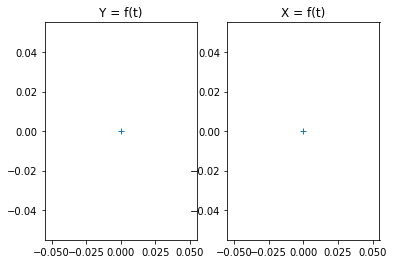

In [8]:
# tracé des équations horaires du mouvement
while Y[-1]>0:
    t.append(t[-1]+dt)
    Y.append(Y[0]-0.5*g*t[-1]**2)
    X.append(0)
plt.subplot(1,2,1)
plt.plot(t,Y,"+")
plt.title("Y = f(t)")
plt.subplot(1,2,2)
plt.plot(t,X,"+")
plt.title("X = f(t)")
plt.show()

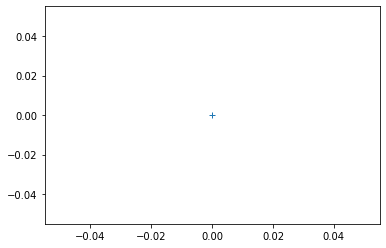

In [9]:
# tracé de la trajectoire
plt.plot(X,Y,"+")
plt.show()

##### Rq (intermédiaire)

Il est possible d'obtenir une interface interactive de matplotlib ou sous forme d'image fixe au choix en utilisant
%matplotlib notebook ou %matplotlib inline en début de notebook dans une cellule de code. La version interactive est intéressante mais nécessite de créer des figures avec un nom différent pour chacune. Exécutez la cellule ci-dessous pour voir.

<IPython.core.display.Javascript object>


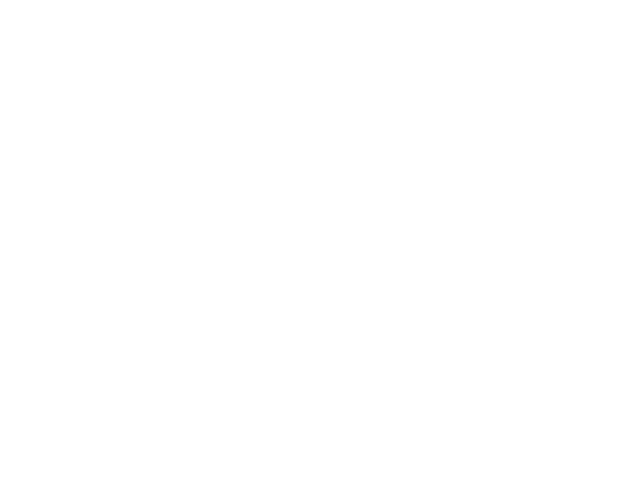

In [10]:
%matplotlib notebook
fig = plt.figure("figure 1")
plt.plot(X,Y,"+")
plt.show()

In [11]:
%matplotlib inline

#### [Retour](#titre)

### <span style="margin-left:2em;"> <a name="partie2.3"></a>II.3 Cellules markdown</span>

Les cellules markdown permettent de faire de la mise en forme basique très rapidement. 
On peut par exemple:
* gérer 6 niveaux de titres avec des #
* mettre du texte **en gras** en l'encadrant avec ** 
* mettre *en italique* en l'encadrant avec *
* faire une liste à puce en démarrant chaque ligne par *
* faire de la numérotation en démarrant chaque ligne par 1.
* intégrer une image ou un lien hypertexte avec une syntaxe très simple.
* faire des tableaux avec une syntaxe très simple

Les blocs de texte sont justifiés par défaut. Un retour à la ligne se fait en terminant la ligne précédente par deux espaces puis Enter.  
Un nouveau paragraphe se fait en sautant deux lignes dans la cellule markdown.

**Double cliquez** sur chacune des cellules markdown suivantes afin de visualiser la syntaxe puis utilisez **CTRL + Enter** afin de les exécuter et de voir le rendu.

#### Retour à la ligne et paragraphe

Ceci est une phrase.
Ceci est une deuxième à la suite.  
Ici il y a un retour à la ligne.


Et un nouveau paragraphe.

#### Les titres

* Les six niveaux de titre.
# Titre
## sous-titre
### titre de partie
#### sous-titre de partie
##### vraiment un petit titre
###### Celui-ci c'est le dernier

#### Les mises en forme basiques

* Texte en gras et/ou en italique:

**Ceci est un texte en gras**  
*Ceci est un texte en italique*  
**Ceci est un texte en gras *avec certains mots* en italique**

#### Les listes

Liste à puces:
* premier élément
    * sous element (utilisation de la tabulation)
        * sous sous element
        * idem
    * et on revient au niveau 2
* deuxième élément
* troisième élément

Liste numérotée:
1. premier
    1. sous element (utilisation de la tabulation)
        1. sous sous element
        1. idem
    1. et on revient au niveau 2
1. deuxième
1. troisième


On peut bien sûr démarrer à la valeur que l'on veut:
4. quatre
    3. sous element en commencant à 3
        5. sous sous element en commencant à 5
        5. suivant
    3. suivant
5. cinq
6. six

#### Liens et images

Syntaxe pour un hyperlien: Texte entre crochet puis adresse entre parenthèses. La partie entre guillemets est facultative.  
[ceci est un hyperlien](https://www.facebook.com/franceinfo/posts/178602342587458/ "google c'est le mal!")



Syntaxe pour une image: un point d'exclamation, puis un texte de remplacement entre crochet suivi de l'adresse de l'image entre parenthèses
![ceci est une image avec une adresse relative -cad à partir de celle du dépôt-](img/disquette.png)



Ceci fonctionne également pour une image hébergée en ligne
![Ceci est une image avec une adresse en ligne](https://cdn.radiofrance.fr/s3/cruiser-production/2020/01/0ef129dc-2033-4aa1-9cce-eff92c7c6405/870x489_83080808_10215765581880139_4393035134673092608_n_2.webp)


Syntaxe pour une image cliquable: simplement la syntaxe d'une image mise à la place du texte du lien. La partie entre guillemets est facultative.
[![ceci est une image cliquable](img/fleches.png)](https://github.com/jcamponovo/formation2020 "tu peux cliquer ici!")

#### Exercice:

Reproduire dans la cellule suivante (sans double cliquer sur cette  cellule!) la mise en forme suivante:

# TP Réfraction
Consignes:
* On lit
* On mesure
* On exploite
![](refraction.png "adresse de l'image uniquement refraction.png car à la racine du dépot")

Pour information: Il y a un grand titre, une liste à puces et une image d'adresse refraction.png

**A vous de jouer! Ici**



#### (intermédiaire) Les tableaux


* Première ligne d'entête avec des éléments séparés par des | (CTRL + ALT + 6) qui représentent les barres verticales du tableau.
* Deuxième ligne qui représente la barre horizontale sous l'entête et l'alignement dans les colonnes.

| Première colonne | deuxième colonne | troisième colonne |
| :--- | ---: | :---: |
| Aligné à gauche | Aligné à droite | centré |
| **gras** | *italique* | ~~barré~~ |


Inutile d'aligner les |, cela se débrouille à l'exécution avec le nombre de cases

#### (avancé) Latex

On peut intégrer un peu de Latex pour obtenir de jolies formules de physique et de chimie:  

$\large{\boldsymbol{\overrightarrow{F_{A\rightarrow B}} = - \mathscr{G} \frac{m_A m_B}{d_{AB}^2} \overrightarrow{u}}}$  
$C_6H_{12}O_6 \Rightarrow 2\ CH_3-CH_2-OH\ +\ 2\ CO_2$


On peut aller bien plus loin car on a la main sur la configuration du serveur virtuel et l'extension jupyter load tex macros (non testées) permet a priori d'importer à l'ouverture du notebook les bibliothèques et macros personnelles

#### (avancé) HTML

Les balises HTML sont aussi acceptées dans les cellules markdown ce qui permet de faire de la mise en forme plus fine si vous le souhaitez.

<h1 style="text-align:center; color:red; text-decoration:underline;">Un joli titre</h1>
<img src="img/fork.png" width="50%">


#### [Retour](#titre)

### <span style="margin-left:2em;"><a name="partie2.4"></a>II.4 Mise en forme avancee</span>

Jupyter permet d'ajouter dans un document de manière très simple des vidéos, des pages web ou encore une présentation genial.ly
Voici quelques tours de main pour pouvoir le faire.

#### Vidéo Youtube

Il suffit de cliquer sur **SHARE** sous la vidéo proposée sur youtube

![](img/partage_youtube.png)


Puis copier le code HTML de partage, après avoir éventuellement configuré ce code avec l'interface proposée.
![](img/partage_youtube2.png)

Ce code est simplement collé dans une cellule de code python comme dans l'exemple ci-dessous

In [12]:
from IPython.display import HTML,IFrame
HTML("""<iframe width="560" height="315" src="https://www.youtube.com/embed/FRteNtwuaWg" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>""")

/srv/conda/envs/notebook/lib/python3.7/site-packages/IPython/core/display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Une autre solution consiste à récupérer le code unique identifiant la vidéo (**visible dans l'URL** ou en cliquant sur **partager**) et de la coller dans une cellule de code python comme ci-dessous

In [13]:
from IPython.display import YouTubeVideo
YouTubeVideo("FRteNtwuaWg",width="560px", height="315px")


##### Exercice:

Utilisez la cellule de code ci-dessous afin d'afficher une vidéo youtube de votre choix sur ce document.

In [14]:
# A vous de jouer!

#### Vidéo Viméo

De la même manière, sur Viméo, on clique sur partager et on copie le code HTML de partage noté **intégration**.
![](img/partage_vimeo.png)
On colle ensuite ce code dans une cellule de code python et on ajoute un triple guillemet de chaque coté et on utilise la fonction HTML comme ci-dessous.

In [15]:
from IPython.display import HTML,IFrame
HTML("""<iframe src="https://player.vimeo.com/video/146921362?color=fcd94f&title=0&byline=0&portrait=0" width="640" height="360" frameborder="0" allow="autoplay; fullscreen" allowfullscreen></iframe>
<p><a href="https://vimeo.com/146921362">Physique et caf&eacute;ine</a> from <a href="https://vimeo.com/charlottearene">Charlotte Arene</a> on <a href="https://vimeo.com">Vimeo</a>.</p>""")

#### Genia.ly et pages web

Aves une présentation genial.ly, il suffit de cliquer sur **partager => insert** et de copier le cod iframe. Il est ensuite utilisé comme tout à l'heure dans une cellule de code 

In [16]:
from IPython.display import HTML,IFrame

HTML("""<div style="width: 100%;">
  <div style="position: relative; padding-bottom: 56.25%; padding-top: 0; height: 0;">
    <iframe style="position: absolute; top: 0; left: 0; width: 100%; height: 100%;" src="https://view.genial.ly/5ee7245f9a05850d6d9963d8" type="text/html" allowscriptaccess="always" allowfullscreen="true" scrolling="yes" allownetworking="all" width="1200px"
    height="675px" frameborder="0"></iframe>
  </div>
</div>""")

Pour une page web, on récupère l'URL et on la colle dans une cellule de code python comme dans l'exemple ci-dessous. Elle doit être sous la forme d'une chaine de caractères et représente l'argument "src" de la **fonction IFrame**. Il reste à choisir la largeur et la hauteur du conteneur utilisé pour visualiser cette page (**arguments width et height**). 

In [17]:
IFrame(src="https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html", width=900, height=600)

#### (intermédiaire) Cacher certaines cellules de code

On peut cacher spécifiquement certaines cellules de code et même cacher uniquement le code python en laissant la sortie visible ou le contraire. Cele peut être utile pour cacher la ligne de code python avant une vidéo ou une animation par exemple.


Pour cela, on peut utiliser l'extension **runtools** installée dans cet environnement.  



1. Cliquer sur le bouton en forme de rouages dans la barre d'outils ![](img/icone_runtools.png)

2. Cela fait apparaître un menu **Runtools** comportant de nombreuses icones.

![](img/icone_runtools2.png)

3. Pour cacher une entrée, il faut:
    * cliquer sur le **rond vide -unmark all cells-** pour déselctionner toutes les cellules qui peuvent l'être
    * cliquer sur la cellule à cacher
    * cliquer sur **la punaise -Mark single cell-
    * cliquer sur n'importe lequel des 4 boutons **Hide cell input**, **Show cell input**, **Hide cell output** ou **Show cell output** en fonction de l'action souhaitée.
    * cliquer sur le **rond vide -unmark all cells-** pour déselectionner la cellule modifiée.

##### Exercice:

Cacher le code de la cellule suivante en conservant la courbe (sortie).

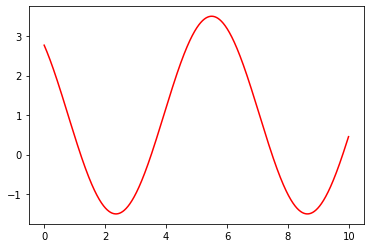

In [18]:
import matplotlib.pyplot as plt
from math import cos, pi
X = [i/100 for i in range(1000)]
Y = [2.5*cos(x+pi/4)+1 for x in X]
plt.plot(X,Y,"r")
plt.show()

#### (intermédiaire) Afficher un bouton pour cacher une correction

Un petit bout de code python/javascript est disponible sur ce dépôt pour permettre de cacher/afficher une cellule facilement. Pour cela, il suffit d'utiliser la fonction cacher_code dans la cellule de code python précédent celle à cacher. Cette fonction masque sa propre cellule et affiche un lien permettant de changer l'état de la cellule suivante. Le texte du lien est donné en argument. Dans l'exemple ci-dessous on a utilisé:
```
from masquer import *
cacher_code('Correction')
```
On peut réafficher puis éditer la cellule qui affiche le lien en utilisant **runtools** comme indiqué dans le paragraphe précédent.

**Exemple d'exercice**

Modifier le code python ci-dessous afin de mettre un titre au graphique, "abscisses" sur l'axe des abscisses et "ordonnées" sur l'axe des ordonnées.

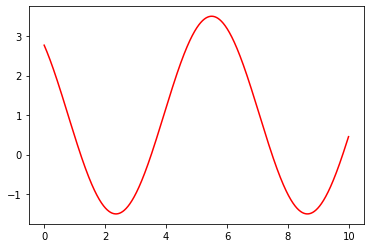

In [19]:
import matplotlib.pyplot as plt
from math import cos, pi
X = [i/100 for i in range(1000)]
Y = [2.5*cos(x+pi/4)+1 for x in X]
plt.plot(X,Y,"r")
plt.show()

In [22]:
from masquer import *
cacher_code("Correction")

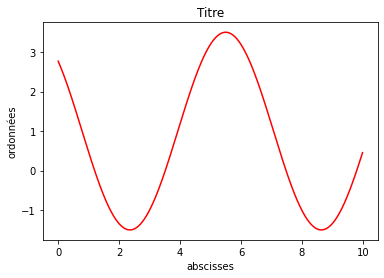

In [21]:
import matplotlib.pyplot as plt
from math import cos, pi
X = [i/100 for i in range(1000)]
Y = [2.5*cos(x+pi/4)+1 for x in X]
plt.title("Titre")
plt.plot(X,Y,"r")
plt.xlabel("abscisses")
plt.ylabel("ordonnées")
plt.show()

#### (Avancé) Faire un graphique interactif avec les ipywidgets

Il y a de nombreux widgets avec beaucoup de personnalisations possibles. On peut donc faire des choses assez fines. Ce qui m'intéresse ici ce sont les possibilités d'obtenir très facilement quelque chose de fonctionnel sans avoir à gérer les événements.  
Le plus gros défaut de ces widgets est le mauvais fonctionnement du slider sur les écrans tactiles. Ainsi, ceux qui veulent approfondir devraient plutot passer par ipyvuetify et bqplot que je ne developperai pas ici.


Un petit exemple pour se rendre compte:

In [45]:
%matplotlib inline
from ipywidgets import interactive,FloatSlider
import matplotlib.pyplot as plt
import numpy as np

# Valeur par défaut = initialisation du widget
def f(A=1.5, freq=0.5, phi=0):
    plt.figure("figure interactive",figsize=(8, 6), dpi=80)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, A*np.sin(2*np.pi*freq*x+phi))
    plt.ylim(-5, 5)
    plt.show()
                                # Pour chaque widget An freq et phi, on donne min, max, step
interactive_plot = interactive(f, A=(0, 4.0,0.1), freq=(0.1, 2, 0.1), phi=(-np.pi,np.pi,np.pi/10))
output = interactive_plot.children[-1]
output.layout.height = '400px'
display(interactive_plot)

interactive(children=(FloatSlider(value=1.5, description='A', max=4.0), FloatSlider(value=0.5, description='fr…

On a encore:

In [44]:
from ipywidgets import interact
import numpy as np

@interact(axes=True,titre="Titre",couleur=["r","g","b"])
def f(axes = True, titre= "Titre",couleur = "r"):
    plt.figure("test")
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, 2*np.sin(2*np.pi*x), color=couleur)
    plt.title(titre)
    if axes:
        plt.xlabel("abscisses")
        plt.ylabel("ordonnées")
    else:
        plt.axis('off')
    plt.show()

interactive(children=(Checkbox(value=True, description='axes'), Text(value='Titre', description='titre'), Drop…

Voici la documentation si vous voulez approfondir un peu, mais même en restant simple comme dans les deux exemples précédents, il y a de belles possibilités d'utilisations.

In [47]:
IFrame(src="https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html",width=900,height=600)

### [Retour](#titre)

## <a name="partie3"></a>III. Utilisations et extension

Utilisations:
* proposer un environnement de programmation à distance ou en présence a ses élèves sans installation
* rediger des documents interactifs
* proposer des comtpes rendus de tp numériques préformatés
* (intermédiaire) Proposer des TP hybrides basés sur des simulations (distance) ou manipulation (présence) avec une même exploitation
* (intermédiaire à avancé) Réaliser de petites simulations modifiables par les élèves basées sur matpltolib
* (intermédiaire) Réaliser des présentations interactives
* (avancé) Réaliser des simulations avec bqplot et vuetify
* (NSI) Tester du code HTML et Javascipt

Utilisations particulières et extensions configurées dans ce dépot github:
=> Appmode (transforme un notebook en application web éditable, cache automatiquement tous les blocs de code)

=> Rise (transforme un notebook en presentation mais tout reste editable et interactif comme dans jupyter!)

=> Voila (transforme un notebook en page web interactive)

=> Initialization_cells (permet d'exécuter certaines cellules au démarrage du notebook sans action de l'utilisateur

=> 

<span style="text-align:right;">[Retour](#titre)</span>

## <a name="partie4"></a>IV. Petites recettes

from IPython.display import HTML

#HTML('''<script> $('div .input').hide()''')

from IPython.display import HTML
import random

def cacher_code(for_next=True):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Montrer/Cacher le code'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' '#next cell
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

from IPython.display import Javascript
timeout = 120 # minutes
Javascript("""let timerId = setInterval(() => Jupyter.notebook.execute_cells([1]), 180000);
setTimeout(() => { clearInterval(timerId); alert('fin de cession'); },"""+ str(timeout*1000*60)+")")